<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt


%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = r"D:\IOD\Data\Datasets 2\Sacramento_transactions.csv"
house = pd.read_csv(house_csv)

In [76]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [77]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [78]:
house.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [79]:
# change type of data
#zip
house['zip'] = house['zip'].astype(str)
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    object 
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 92.5+ KB


In [80]:
# sale_Date
house['sale_date'] = house['sale_date'].str.replace('EDT', 'UTC+4')
house.head(2)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 UTC+4 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 UTC+4 2008,68212,38.478902,-121.431028


In [81]:
house['sale_date'] = pd.to_datetime(house['sale_date'])
house.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [82]:
house.head(3)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21 00:00:00-04:00,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21 00:00:00-04:00,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21 00:00:00-04:00,68880,38.618305,-121.443839


In [155]:
import folium
from folium.plugins import HeatMap

map_base = folium.Map(location = [38.575764, -121.478851], zoom_start = 8)
map_data = pd.DataFrame(data=house, columns=('latitude','longitude'))
map_data.head()


,latitude,longitude
0,38.631913,-121.434879
1,38.478902,-121.431028
2,38.618305,-121.443839
3,38.616835,-121.439146
4,38.519470,-121.435768


In [156]:
map_data['dimension'] = 1
map_data.head(2)

,latitude,longitude,dimension
0,38.631913,-121.434879,1
1,38.478902,-121.431028,1


In [157]:
HeatMap(map_data).add_to(map_base)
display(map_base)

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [83]:
# ANSWER
# the price is the target variable

#### 2.2 List all possible variables which might be Predictor variable.

In [84]:
# ANSWER
#beds, sq_ft, type,sale_date, bath

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [85]:
# ANSWER
house.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [86]:
# ANSWER
# choose sq_ft to be the predictor, it has strong coorelation with baths, beds, and price

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [87]:
# ANSWER
house['price_mean'] = house['price'].mean()
house.head(2)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,price_mean
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21 00:00:00-04:00,59222,38.631913,-121.434879,234144.263959
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21 00:00:00-04:00,68212,38.478902,-121.431028,234144.263959


#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [88]:
# ANSWER
Y = house['price']
X = house['sq__ft']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [114]:
# ANSWER
def calculate_beta1(X, Y):
    X_mean = X.mean()
    Y_mean = Y.mean()
    
    upper = np.sum((Y-Y_mean)*(X-X_mean))
    lower = np.sum(np.square(X- X_mean))
    
    beta1 = upper/lower
    return beta1

calculate_beta1(X,Y)
beta1 = calculate_beta1(X,Y)

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [115]:
# ANSWER
def calculate_beta0(X, Y):
    X_mean = X.mean()
    Y_mean = Y.mean()
    beta_0 = Y_mean - calculate_beta1(X,Y) * X_mean
    return beta_0
    
beta_0 = calculate_beta0(X,Y)
beta_0

162930.16140699777

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [116]:
# ANSWER
def calculate_yhat(X, Y):
    y_hat = calculate_beta0(X,Y) + calculate_beta1(X,Y) * X
    return y_hat
calculate_yhat(X, Y)
yhat = calculate_yhat(X, Y)
yhat

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [117]:
# ANSWER
def calculate_residual(X,Y):
    residual = Y - calculate_yhat(X, Y)
    return residual
calculate_residual(X,Y)
abs(calculate_residual(X,Y))

0      148984.784187
1      157921.293924
2      137160.438599
3      139766.322422
4      124194.597239
           ...      
980     53986.859897
981      8922.472227
982      6212.932732
983     18886.469282
984       956.228663
Length: 985, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [118]:
# ANSWER
def calculate_total_sum_of_square(Y):
    Y_mean = Y.mean()
    SStot = np.square(Y - Y_mean)
    SStot = np.sum(SStot)
    return SStot
calculate_total_sum_of_square(Y)
    

18838783738865.37

In [119]:
def calculate_residual_sum_of_squre(Y, yhat):
    SSres = np.square(Y-yhat)
    SSres = np.sum(SSres)
    return SSres
calculate_residual_sum_of_squre(Y, yhat)


16738500924917.504

In [120]:
def calculate_r_square(Y, yhat):
    SStot = calculate_total_sum_of_square(Y)
    SSres = calculate_residual_sum_of_squre(Y, yhat)
    Rsquare = 1 - (SSres/SStot)
    return Rsquare

In [121]:
calculate_r_square(Y,np.mean(Y))

0.0

In [122]:
calculate_r_square(Y, calculate_yhat(X, Y))

0.11148717682951459

In [123]:
calculate_r_square(Y, yhat)

0.11148717682951459

##### 2.7.F [BONUS] Draw Plot of Predicted Line

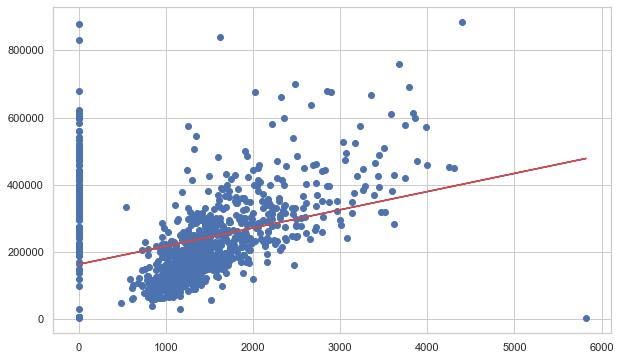

In [124]:
# ANSWER
def draw_plot_0(X, Y, yhat):
    plt.scatter(X,Y, c= 'b')
    plt.plot(X,yhat, color='r');
    plt.show()
draw_plot_0(X,Y, yhat)

In [125]:
yhat

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

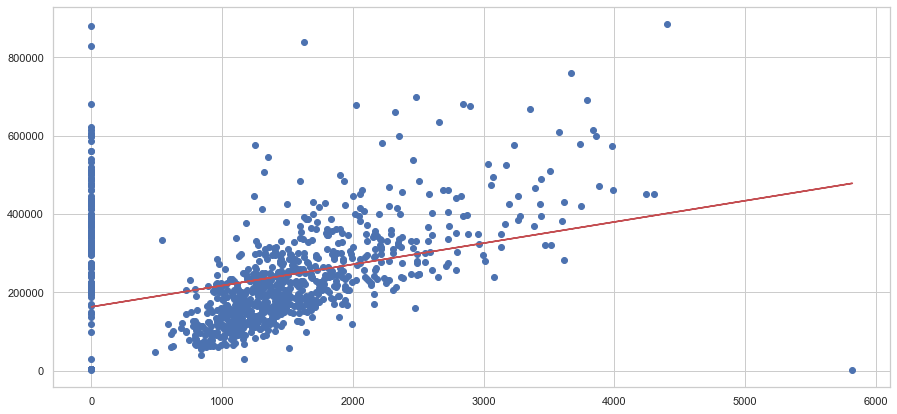

In [126]:

sns.set_context("poster")
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style("whitegrid")

def draw_plot_1(X, Y, yhat):
    fig = plt.figure(figsize = (15,7))
    ax = plt.gca()
    plt.scatter(X,Y, c= 'b')
    plt.plot(X,yhat, color='r');
    plt.show()
draw_plot_1(X,Y, yhat)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

In [127]:
# ANSWER
house['yhat'] = yhat
house.head(2)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,price_mean,yhat
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21 00:00:00-04:00,59222,38.631913,-121.434879,234144.263959,208206.784187
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21 00:00:00-04:00,68212,38.478902,-121.431028,234144.263959,226133.293924


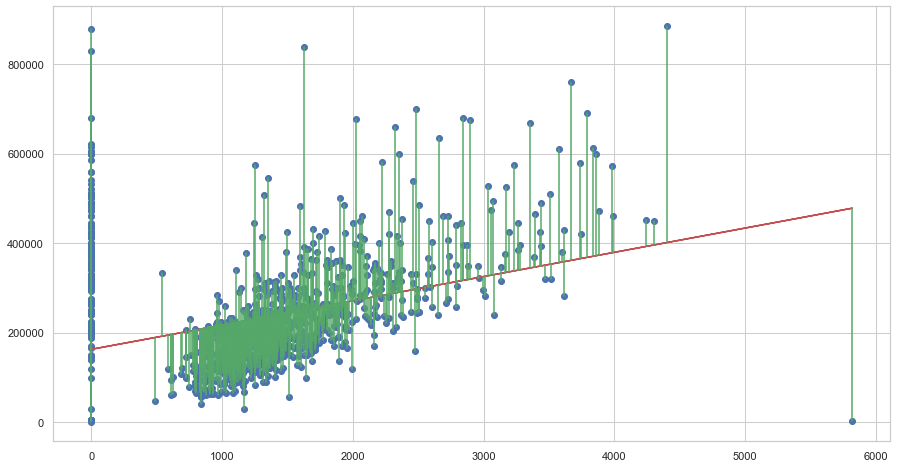

In [128]:
fig = plt.figure (figsize = (15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

ax = fig.gca()

ax.scatter(x=X, y=Y, c='b')
ax.plot(X, yhat, color='r');

for _, row in house.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['yhat']), 'g-')

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [133]:
# ANSWER
x_predict = 1204
beta_0


162930.16140699777

In [132]:
beta1

54.158639688530755

In [134]:
Y_predict = beta1 * x_predict + beta_0
Y_predict

228137.1635919888



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



